# Readme

**<u>Index Prices Data</u>**

**1.1-FTSE-IDX_VOL30-PRICES_2006-2023.csv** (sync 14 Jul) \
desc: The original Daily 30 rolling YZ volatility of the FTSE Index

**1.1-FTSE-IDX_VOL30-MONTHLY-PRICES_2006-2023.csv** \
desc: The original Monthly 30 rolling YZ volatility of the FTSE Index

**<u>All Assets Prices Data</u>**

**1.1-FTSE_VOL30-PRICES_2006-2023.csv** (sync 14 Jul) \
desc: The original daily 30 rolling YZ volatility of the entire PIT FTSE assets.

**1.1-FTSE_VOL30-MONTHLY-PRICES_2006-2023.csv** \
desc: The original monthly 30 rolling YZ volatility of the entire PIT FTSE assets.

**<u>ESG Data</u>**

**1.2-FTSE_ESG_COR_2006-2023.csv** (sync 14 Jul)\
desc: original core datasets.

**1.3-FTSE_Monthly_ESG_Volatility_Final.csv**\
desc: the final combination between Monthly Volatility and ESG.


---

In [31]:
import sys, os
sys.path.append('../python')
from util import *
import pandas as pd
pd.set_option('display.max_columns', 100)

In [4]:
merge_df = pd.read_csv('../data/1.3-FTSE_Monthly_ESG_Volatility_Final.csv')

In [5]:
merge_df.head()

,Date_x,month_key,Asset,Open,High,Low,Close,Return,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce,V^CC,V^RS,V^YZ
0,2006-03-31,2006-02-01,4295856631,10.072421,10.100322,9.979416,9.998017,-0.002783,458.0,59.0,59.0,66.0,76.0,32.0,67.0,0.0,100.0,62.0,83.0,4.0,16.0,63.0,86.0,85.0,43.0,0.009381,0.008713,0.011151
1,2006-04-28,2006-03-01,4295856631,10.490942,10.546745,10.342134,10.379336,-0.012389,523.0,80.0,76.0,73.0,83.0,79.0,75.0,0.0,100.0,66.0,89.0,4.0,84.0,94.0,95.0,60.0,40.0,0.008596,0.007716,0.009801
2,2006-05-31,2006-04-01,4295856631,10.137524,10.137524,9.914312,9.914312,-0.030909,509.0,74.0,73.0,72.0,76.0,82.0,60.0,0.0,100.0,45.0,93.0,4.0,90.0,86.0,95.0,55.0,5.0,0.014678,0.010464,0.013490
3,2006-06-30,2006-05-01,4295856631,10.137524,10.230529,10.063120,10.230529,0.028037,523.0,63.0,63.0,69.0,74.0,78.0,40.0,0.0,100.0,47.0,87.0,4.0,85.0,88.0,90.0,53.0,12.0,0.016566,0.010636,0.014731
4,2006-07-31,2006-06-01,4295856631,10.109622,10.128223,10.025918,10.100322,0.003697,505.0,64.0,64.0,66.0,77.0,77.0,41.0,0.0,100.0,69.0,81.0,4.0,83.0,91.0,82.0,57.0,12.0,0.013617,0.008261,0.011834


In [6]:
merge_df.shape

(19259, 28)

---

In [10]:
DProcess = Data_Processing('2006-01-01', '2022-12-01')

In [11]:
df_merge = DProcess.merge_data()

In [9]:
df_merge.drop(['Asset', 'Open', 'High', 'Low', 'Close', 'Return'], axis=1).head()

,date_key,V^CC,V^RS,V^YZ,month_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,2006-02-28,0.009932,0.010240,0.011150,2006-01-01,458.0,59.0,59.0,66.0,76.0,32.0,67.0,NaN,100.0,62.0,83.0,NaN,16.0,63.0,86.0,85.0,43.0
1,2006-03-31,0.009381,0.008713,0.011151,2006-02-01,523.0,80.0,76.0,73.0,83.0,79.0,75.0,NaN,100.0,66.0,89.0,NaN,84.0,94.0,95.0,60.0,40.0
2,2006-04-28,0.008596,0.007716,0.009801,2006-03-01,509.0,74.0,73.0,72.0,76.0,82.0,60.0,NaN,100.0,45.0,93.0,NaN,90.0,86.0,95.0,55.0,5.0
3,2006-05-31,0.014678,0.010464,0.013490,2006-04-01,523.0,63.0,63.0,69.0,74.0,78.0,40.0,NaN,100.0,47.0,87.0,4.0,85.0,88.0,90.0,53.0,12.0
4,2006-06-30,0.016566,0.010636,0.014731,2006-05-01,505.0,64.0,64.0,66.0,77.0,77.0,41.0,NaN,100.0,69.0,81.0,4.0,83.0,91.0,82.0,57.0,12.0


In [8]:
df.merge_head(5)

NameError: name 'df' is not defined

In [12]:
df_clean = DProcess.cleansing_final1(fillna = True)

In [25]:
df_clean[df_clean['Asset']== 4295895499]

,date_key,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,month_key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce
0,2006-02-28,4295895499,10.289841,10.542949,10.250901,10.338516,0.005682,0.010941,0.011331,0.012072,2006-01-01,558.0,47.0,44.0,42.0,46.0,64.0,30.0,96.0,48.0,79.0,2.0,12.0,3.0
1,2006-03-31,4295895499,9.501309,9.535382,9.330948,9.355285,-0.015873,0.013376,0.012403,0.014676,2006-02-01,552.5,44.0,44.0,43.0,43.0,59.0,31.0,97.0,45.0,73.0,1.0,12.0,4.0
2,2006-04-28,4295895499,9.369890,9.447767,9.340683,9.369890,0.000000,0.011482,0.011031,0.012279,2006-03-01,626.0,56.0,56.0,57.0,52.0,75.0,41.0,99.0,56.0,93.0,1.0,17.0,23.0
3,2006-05-31,4295895499,8.678706,8.961020,8.664104,8.902610,0.018374,0.013725,0.014706,0.015413,2006-04-01,641.5,53.0,53.0,58.0,48.0,78.0,32.0,99.0,47.0,92.0,2.0,31.0,5.0
4,2006-06-30,4295895499,9.238466,9.272538,9.097309,9.150851,0.000000,0.013977,0.014743,0.016005,2006-05-01,716.5,44.0,44.0,50.0,43.0,18.0,66.0,96.0,41.0,3.0,3.0,69.0,62.0
5,2006-07-31,4295895499,9.666804,9.700876,9.486707,9.486707,-0.014163,0.011870,0.011384,0.012307,2006-06-01,717.5,46.0,46.0,57.0,42.0,20.0,72.0,99.0,37.0,3.0,64.0,79.0,50.0
6,2006-08-31,4295895499,9.846901,9.846901,9.730081,9.764153,-0.009383,0.010952,0.012721,0.013305,2006-07-01,758.5,63.0,63.0,63.0,36.0,72.0,79.0,98.0,33.0,70.0,62.0,77.0,64.0
7,2006-09-29,4295895499,10.328781,10.396925,10.250901,10.289841,0.000000,0.009891,0.010635,0.010812,2006-08-01,797.0,68.0,67.0,65.0,29.0,92.0,81.0,99.0,24.0,93.0,69.0,86.0,71.0
8,2006-10-31,4295895499,10.542949,10.669504,10.513745,10.581889,-0.001837,0.008721,0.011321,0.011476,2006-09-01,798.0,66.0,66.0,67.0,29.0,91.0,76.0,99.0,25.0,93.0,65.0,85.0,62.0
9,2006-11-30,4295895499,10.221698,10.250901,10.085407,10.134082,-0.008572,0.005833,0.009660,0.009973,2006-10-01,821.0,65.0,65.0,65.0,27.0,93.0,72.0,98.0,23.0,94.0,54.0,90.0,60.0


In [16]:
df_clean[['Asset', 'V^YZ']].groupby('Asset').std().sort_values(['V^YZ'], ascending=False)

,V^YZ
Asset,
4295895499,0.038227
5000683618,0.030965
8589934212,0.022161
8589934254,0.022031
4295897861,0.021775
...,...
4295898751,0.004978
4295894667,0.004973
5040053800,0.004507


In [30]:
coverage_df[coverage_df['PermID'] == 8589934212]

,version,filedate,MPID,PermID,Name,TRBC,TRBC_PermID,TRBCEconomicSector,Ticker,MIC,RIC,Domicile,ExchangeCountry,ExchangeCode,InfoCode,Region,SEDOL,SEDOLstatus,status
121092,4.0.30,2023-07-08,RBS,8589934212,Natwest Group PLC,5510101010,4294951386,Financials,NWG,XLON,NWG.L,GB,GB,104,46029,EMEA,BRTM7Y8,inactive,active


In [ ]:
8589934212, 8589934254

In [17]:
coverage_df = pd.read_csv('../data/coverage_dataframe.csv')

In [18]:
coverage_df.PermID = coverage_df.PermID.astype(int)

In [22]:
df_merge[df_merge.Asset.isin([4295856631, 4295894186, 4295894188, 4295894337, 4295894745, 4295894781])][['Asset','date_key(price)']].groupby(['Asset']).max()

,date_key(price)
Asset,
4295856631,2006-10-31
4295894186,2012-05-31
4295894188,2007-03-30
4295894337,2017-05-31
4295894745,2007-11-30
4295894781,2006-08-31


In [23]:
coverage_df[coverage_df.PermID.isin([4295856631, 4295894186, 4295894188, 4295894337, 4295894745, 4295894781])][['PermID', 'Name']]

,PermID,Name
428,4295856631,Brambles Ltd
27274,4295894186,International Power Ltd
27276,4295894188,Scottish Power Ltd
27367,4295894337,Intu Properties PLC
27586,4295894745,Imperial Chemical Industries Ltd
27602,4295894781,BOC Group Ltd


In [8]:
exc = [4295856631, 4295894186, 4295894188, 4295894337, 4295894745, 4295894781, 4295894783, 4295894844, 4295895017, 4295895028, 4295895044, 4295895105, 4295895180, 4295895248, 4295895317, 4295895701, 4295896208, 4295896495, 4295897574, 4295898217, 4295898863, 5000001640, 5000047647, 5000680044, 5034762140, 5000060598, 4295893846, 4295899119, 5000001269, 4295894222, 4295896311, 4295894629, 4295897873, 4295894942, 4295895847, 4295894732, 4295898865, 4295894991, 5000492228, 8589934271, 5000662799, 5000712433, 4295897782, 4295896166, 4295898928, 4295896565, 5046717927, 5052150231, 5035918635, 4295894847, 5045390794, 5037143593, 4295898769, 5039731355, 4295896547, 5080063390, 4295895749, 4295895791, 5066574810, 4295895849, 5080177560, 4295895187, 4295896475, 5081488120]

In [8]:
df_clean.isna().sum()

Date_Key(Price)              0
Asset                        0
Open                         0
High                         0
Low                          0
Close                        0
Return                       0
V^CC                         0
V^RS                         0
V^YZ                         0
Month_Lag(Price)             0
Date_Key                     9
buzz                         9
ESG                          9
ESGCombined                  9
ESGControversies             9
EnvironmentalPillar        115
GovernancePillar            38
SocialPillar                 9
Community                   10
EnvironmentalInnovation    209
Management                  84
ProductResponsibility       90
Shareholders               167
Workforce                  363
dtype: int64

In [7]:
df_clean.isna().sum()

date_key                   0
Asset                      0
Open                       0
High                       0
Low                        0
Close                      0
Return                     0
V^CC                       0
V^RS                       0
V^YZ                       0
month_key                  0
buzz                       0
ESG                        0
ESGCombined                0
ESGControversies           0
EnvironmentalPillar        0
GovernancePillar           0
SocialPillar               0
Community                  0
EnvironmentalInnovation    0
Management                 0
ProductResponsibility      0
Shareholders               0
Workforce                  0
dtype: int64

In [12]:
len(df_clean.Asset.unique())

144

In [8]:
df_clean.to_csv('../data/1.3-FTSE_Monthly_ESG_Volatility_Final_v2.csv')

In [ ]:
pd.read_csv('../data/1.3-FTSE_Monthly_ESG_Volatility_Final.csv')

In [8]:
df_test = DProcess.merge_data()

In [9]:
def count_unique_assets_missing_value(df):
    count_unique_assets_df = pd.DataFrame()
    
    total_unique_assets = len(df.Asset.unique())
    count_missing_rows_df = pd.DataFrame(df.isna().sum()).reset_index()
    count_missing_rows_df.columns = ['cols', 'value']
    missing_rows_cols = count_missing_rows_df[count_missing_rows_df['value'] > 0]['cols'].tolist()
    
    for i, col in enumerate(missing_rows_cols):
        temp_df = df[df[col].isnull()]
        unique_assets = len(temp_df.Asset.unique())
        
        temp2_df = pd.DataFrame({'cols':col,
                        'num_assets': unique_assets,
                        'total_assets': total_unique_assets
                     }, index= [i])
        
        count_unique_assets_df = pd.concat([count_unique_assets_df, temp2_df])
        
    return count_unique_assets_df

In [10]:
def count_missing_rows_assets(df):
    master_df = pd.DataFrame()

    for i, asset in enumerate(df.Asset.unique()):
        df_temp = df[df.Asset == asset]

        df_clean = df_temp.dropna()
        
        temp2_df = pd.DataFrame({ 'num_assets': asset,
                        'missing_rows': df_temp.shape[0] - df_clean.shape[0],
                        'perc_missing': (df_temp.shape[0] - df_clean.shape[0]) / df_temp.shape[0],
                        'total_rows': df_temp.shape[0]
                     }, index= [i])
        
        master_df = pd.concat([master_df, temp2_df])

        
    return master_df

In [57]:
__ = count_unique_assets_missing_value(df_test)

In [59]:
__.sort_values('num_assets', ascending=False)

,cols,num_assets,total_assets
7,CSRStrategy,177,208
11,HumanRights,149,208
14,ResourceUse,119,208
9,Emissions,94,208
16,Workforce,56,208
15,Shareholders,51,208
10,EnvironmentalInnovation,47,208
4,EnvironmentalPillar,37,208
13,ProductResponsibility,34,208
12,Management,31,208


In [56]:
df_test[['Asset','date_key']].groupby('Asset').count().mean()

date_key    92.576923
dtype: float64

In [48]:
import numpy as np

column = 'ResourceUse'

# Let's assume df is your DataFrame and 'column_name' is the name of your column
null_count = df_test[column].isnull().sum()  # count of NaN values
non_null_count = df_test[column].count()  # count of non-NaN values

print(f'Number of Null values of {column}: with {null_count} rows ({null_count/df_test.shape[0]*100:.2f})%')

column = 'HumanRights'

# Let's assume df is your DataFrame and 'column_name' is the name of your column
null_count = df_test[column].isnull().sum()  # count of NaN values
non_null_count = df_test[column].count()  # count of non-NaN values

print(f'Number of Null values of {column}: with {null_count} rows ({null_count/df_test.shape[0]*100:.2f})%')

column = 'CSRStrategy'

# Let's assume df is your DataFrame and 'column_name' is the name of your column
null_count = df_test[column].isnull().sum()  # count of NaN values
non_null_count = df_test[column].count()  # count of non-NaN values

print(f'Number of Null values of {column}: with {null_count} rows ({null_count/df_test.shape[0]*100:.2f})%')

column = 'Emissions'

# Let's assume df is your DataFrame and 'column_name' is the name of your column
null_count = df_test[column].isnull().sum()  # count of NaN values
non_null_count = df_test[column].count()  # count of non-NaN values

print(f'Number of Null values of {column}: with {null_count} rows ({null_count/df_test.shape[0]*100:.2f})%')

Number of Null values of ResourceUse: with 3091 rows (16.05)%
Number of Null values of HumanRights: with 5450 rows (28.30)%
Number of Null values of CSRStrategy: with 6713 rows (34.86)%
Number of Null values of Emissions: with 2240 rows (11.63)%


In [12]:
df_test2 = df_test.drop(['ResourceUse', 'HumanRights', 'CSRStrategy', 'Emissions'], axis=1)

In [13]:
assets_missing_rows_df = count_missing_rows_assets(df_test2)

In [18]:
assets_missing_rows_df.sort_values(['perc_missing', 'total_rows'], ascending=[0,1]).head(10)

,num_assets,missing_rows,perc_missing,total_rows
43,4295895105,1,1.0,1
199,5080063390,1,1.0,1
26,4295894781,7,1.0,7
70,4295897574,8,1.0,8
131,4295894991,8,1.0,8
85,5034762140,16,1.0,16
27,4295894783,18,1.0,18
101,5000001269,18,1.0,18
79,5000001640,22,1.0,22
83,5000680044,43,1.0,43


In [ ]:
assets_missing_rows_df.sort_values('perc_missing', ascending=False).head(7)

In [90]:
excludes = assets_missing_rows_df[(assets_missing_rows_df.perc_missing > 0.5) | (assets_missing_rows_df.total_rows <= 24)].sort_values('perc_missing', ascending=False).num_assets.tolist()

In [91]:
df_test2 = df_test2[~(df_test2.Asset.isin(excludes))]

In [93]:
len(df_test2.Asset.unique())

144

In [94]:
count_unique_assets_missing_value(df_test2)

,cols,num_assets,total_assets
0,Date_Key,1,144
1,buzz,1,144
2,ESG,1,144
3,ESGCombined,1,144
4,ESGControversies,1,144
5,EnvironmentalPillar,16,144
6,GovernancePillar,4,144
7,SocialPillar,1,144
8,Community,1,144
9,EnvironmentalInnovation,26,144


In [96]:
df_test2[df_test2.EnvironmentalInnovation.isnull()]

,Date_Key(Price),Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,Month_Lag(Price),Date_Key,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,Community,EnvironmentalInnovation,Management,ProductResponsibility,Shareholders,Workforce
212,2006-02-28,4295894068,11.789199,11.839438,11.613366,11.688723,-0.014124,0.014071,0.015681,0.016734,2006-01-01,2006-01-31,148.5,60.0,60.0,76.0,95.0,52.0,54.0,92.0,NaN,62.0,NaN,17.0,19.0
213,2006-03-31,4295894068,11.052374,11.211462,10.968644,11.119358,0.008352,0.014477,0.013300,0.014515,2006-02-01,2006-02-28,145.5,65.0,65.0,72.0,94.0,51.0,70.0,90.0,NaN,61.0,73.0,18.0,50.0
214,2006-04-28,4295894068,11.211462,11.211462,10.910033,10.968644,-0.021658,0.013824,0.015176,0.015588,2006-03-01,2006-03-31,146.5,62.0,62.0,74.0,87.0,52.0,65.0,84.0,NaN,62.0,68.0,19.0,44.0
215,2006-05-31,4295894068,9.980629,10.349041,9.846661,10.047615,-0.004149,0.026183,0.021605,0.023561,2006-04-01,2006-04-28,135.5,59.0,59.0,72.0,85.0,49.0,63.0,79.0,NaN,58.0,67.0,16.0,44.0
216,2006-06-30,4295894068,10.382533,10.541621,10.181581,10.332295,0.004068,0.026987,0.021544,0.024870,2006-05-01,2006-05-31,137.5,59.0,59.0,70.0,74.0,53.0,58.0,80.0,NaN,53.0,59.0,56.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18402,2017-04-28,4295895352,3.727000,3.758999,3.723999,3.750000,0.004017,0.009826,0.007273,0.008442,2017-03-01,2017-03-31,51.0,66.0,40.0,14.0,NaN,61.0,72.0,76.0,NaN,66.0,NaN,47.0,67.0
18403,2017-05-31,4295895352,3.994998,4.028999,3.970999,3.970999,-0.004263,0.008214,0.006867,0.007468,2017-04-01,2017-04-28,56.0,65.0,40.0,14.0,NaN,59.0,73.0,79.0,NaN,63.0,NaN,47.0,61.0
18404,2017-06-30,4295895352,4.013999,4.037998,3.985999,3.997998,-0.004235,0.010748,0.007509,0.009800,2017-05-01,2017-05-31,72.0,45.0,34.0,24.0,7.0,47.0,80.0,93.0,NaN,47.0,NaN,46.0,57.0
18405,2017-07-31,4295895352,4.033999,4.105220,4.033999,4.052000,0.003965,0.008680,0.007279,0.008415,2017-06-01,2017-06-30,68.0,53.0,39.0,25.0,8.0,67.0,77.0,90.0,NaN,72.0,NaN,47.0,54.0


In [22]:
test_df[test_df.Asset == 4295894186].to_csv('../data/null_understanding_4295894186.csv')

In [11]:
test_df[test_df.Workforce.isnull()].to_csv('../data/null_understanding.csv', index=None)

In [14]:
test_df[test_df.Workforce.isnull()].Asset.unique()

array([4295894186, 4295894337, 4295895044, 4295897574, 5000680044,
       5034762140, 4295895174, 5080063390])

In [15]:
FTSE_ESG_Core = pd.read_csv('../data/1.2-FTSE_ESG_COR_2006-2023.csv')

In [17]:
FTSE_ESG_Core[FTSE_ESG_Core.Asset == 4295894186]

,Asset,Date,windowTimestamp,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
70919,4295894186,2008-01-10,2008-01-10 20:30:00+00:00,2.0,31.0,31.0,94.0,31.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70920,4295894186,2008-01-11,2008-01-11 20:30:00+00:00,2.0,31.0,31.0,94.0,31.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70921,4295894186,2008-01-12,2008-01-12 20:30:00+00:00,2.0,32.0,32.0,94.0,32.0,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70922,4295894186,2008-01-13,2008-01-13 20:30:00+00:00,2.0,32.0,32.0,94.0,32.0,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70923,4295894186,2008-01-14,2008-01-14 20:30:00+00:00,2.0,32.0,32.0,94.0,32.0,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227647,4295894186,2012-05-27,2012-05-27 19:30:00+00:00,6.0,42.0,42.0,72.0,NaN,NaN,42.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227648,4295894186,2012-05-28,2012-05-28 19:30:00+00:00,6.0,42.0,42.0,72.0,NaN,NaN,42.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227649,4295894186,2012-05-29,2012-05-29 19:30:00+00:00,6.0,41.0,41.0,72.0,NaN,NaN,41.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227650,4295894186,2012-05-30,2012-05-30 19:30:00+00:00,6.0,41.0,41.0,73.0,NaN,NaN,41.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [4]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [5]:
Volatility_IDX_df = pd.read_csv('../data/1.1-FTSE-IDX_VOL30-PRICES_2006-2023.csv')
day_trading = Volatility_IDX_df.loc[:,['Date']]

In [2]:
day_trading.Date = pd.to_datetime(day_trading.Date)
day_trading.loc[:, 'Month_Key'] = day_trading.Date.apply(lambda x: x.strftime('%Y-%m-01'))
day_trading.Month_Key = pd.to_datetime(day_trading.Month_Key)

In [3]:
date_list = []
for date in day_trading.Month_Key.unique():

    temp_df = day_trading[day_trading.Month_Key == date].copy()
    temp_df = temp_df.sort_values(by= 'Date', ascending=True)
    dt = temp_df.iloc[-1, 0]
    date_list.append(dt)

In [4]:
Volatility_IDX_df.Date = pd.to_datetime(Volatility_IDX_df.Date)

In [5]:
Volatility_IDX_df = Volatility_IDX_df.iloc[:,1: ]

In [6]:
Volatility_IDX_df = Volatility_IDX_df[Volatility_IDX_df.Date.isin(date_list)].iloc[2:]

In [58]:
Volatility_IDX_df.to_csv('files/1.1-FTSE-IDX_VOL30-MONTHLY-PRICES_2006-2023.csv')

# Merged DataFrames

## Volatility

In [2]:
volatility_df = pd.read_csv('../data/1.1-FTSE_VOL30-PRICES_2006-2023.csv')

In [3]:
volatility_df.head(2)

,Month,Date,Asset,Currency,PermID,Ticker,RIC,Open,High,Low,Close,Volume,UnadjClose,Jump,Group,Return,Close_t-1,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,2006-01-01,2006-01-03 00:00:00,4295856631,AUD,4295856631,BXB,BXB.AX,9.384185,9.486490,9.365584,9.486490,2.503309e+06,10.20,False,0,NaN,NaN,NaN,0.010843,-0.001984,0.010843,NaN,NaN,0.000025,NaN,NaN,NaN
1,2006-01-01,2006-01-04 00:00:00,4295856631,AUD,4295856631,BXB,BXB.AX,9.505091,9.663199,9.505091,9.616697,2.410045e+06,10.34,False,0,0.013725,9.48649,0.001959,0.016497,0.000000,0.011673,NaN,NaN,0.000080,NaN,NaN,NaN


In [2]:
volatility_df.Date = pd.to_datetime(volatility_df.Date)
volatility_df.Asset = volatility_df.Asset.astype(int)

volatility_df.drop(['Month', 'Currency', 'PermID', 'Ticker', 'RIC', 'UnadjClose'], axis=1, inplace=True)

,Date,Asset,Open,High,Low,Close,Volume,Jump,Group,Return,Close_t-1,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,2006-01-03,4295856631,9.384185,9.486490,9.365584,9.486490,2.503309e+06,False,0,NaN,NaN,NaN,0.010843,-0.001984,0.010843,NaN,NaN,0.000025,NaN,NaN,NaN
1,2006-01-04,4295856631,9.505091,9.663199,9.505091,9.616697,2.410045e+06,False,0,0.013725,9.48649,0.001959,0.016497,0.000000,0.011673,NaN,NaN,0.000080,NaN,NaN,NaN


In [3]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [4]:
Volatility_IDX_df = pd.read_csv('../data/1.1-FTSE-IDX_VOL30-PRICES_2006-2023.csv')
day_trading = Volatility_IDX_df.loc[:,['Date']]
day_trading.Date = pd.to_datetime(day_trading.Date)
day_trading.loc[:, 'Month_Key'] = day_trading.Date.apply(lambda x: x.strftime('%Y-%m-01'))
day_trading.Month_Key = pd.to_datetime(day_trading.Month_Key)

In [5]:
date_list = []
for date in day_trading.Month_Key.unique():

    temp_df = day_trading[day_trading.Month_Key == date].copy()
    temp_df = temp_df.sort_values(by= 'Date', ascending=True)
    dt = temp_df.iloc[-1, 0]
    date_list.append(dt)

In [4]:
Volatility_IDX_df.Date = pd.to_datetime(Volatility_IDX_df.Date)

In [5]:
Volatility_IDX_df = Volatility_IDX_df.iloc[:,1: ]

In [6]:
Volatility_IDX_df = Volatility_IDX_df[Volatility_IDX_df.Date.isin(date_list)].iloc[2:]

In [58]:
Volatility_IDX_df.to_csv('files/1.1-FTSE-IDX_VOL30-MONTHLY-PRICES_2006-2023.csv')

# Merged DataFrames

## Volatility

In [7]:
volatility_df = pd.read_csv('../data/1.1-FTSE_VOL30-PRICES_2006-2023.csv')
volatility_df.Date = pd.to_datetime(volatility_df.Date)
volatility_df.Asset = volatility_df.Asset.astype(int)

In [8]:
volatility_df.head()

,Month,Date,Asset,Currency,PermID,Ticker,RIC,Open,High,Low,Close,Volume,UnadjClose,Jump,Group,Return,Close_t-1,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,2006-01-01,2006-01-03,4295856631,AUD,4295856631,BXB,BXB.AX,9.384185,9.486490,9.365584,9.486490,2.503309e+06,10.20,False,0,NaN,NaN,NaN,0.010843,-0.001984,0.010843,NaN,NaN,0.000025,NaN,NaN,NaN
1,2006-01-01,2006-01-04,4295856631,AUD,4295856631,BXB,BXB.AX,9.505091,9.663199,9.505091,9.616697,2.410045e+06,10.34,False,0,0.013725,9.486490,0.001959,0.016497,0.000000,0.011673,NaN,NaN,0.000080,NaN,NaN,NaN
2,2006-01-01,2006-01-05,4295856631,AUD,4295856631,BXB,BXB.AX,9.700401,9.746904,9.625997,9.663199,4.212039e+06,10.39,False,0,0.004836,9.616697,0.008666,0.004782,-0.007700,-0.003842,NaN,NaN,0.000071,NaN,NaN,NaN
3,2006-01-01,2006-01-06,4295856631,AUD,4295856631,BXB,BXB.AX,9.598096,9.616697,9.505091,9.560894,3.953997e+06,10.28,False,0,-0.010587,9.663199,-0.006760,0.001936,-0.009737,-0.003884,NaN,NaN,0.000068,NaN,NaN,NaN
4,2006-01-01,2006-01-09,4295856631,AUD,4295856631,BXB,BXB.AX,9.598096,9.653899,9.598096,9.625997,3.145075e+06,10.35,False,0,0.006809,9.560894,0.003884,0.005797,0.000000,0.002903,NaN,NaN,0.000017,NaN,NaN,NaN


In [17]:
volatility_df.drop(['Month', 'Currency', 'PermID', 'Ticker', 'RIC', 'UnadjClose'], axis=1, inplace=True)

In [18]:
analysis_cols = ['Date','Asset', 'Open', 'High', 'Low', 'Close', 'Return', 'V^CC', 'V^RS', 'V^YZ']
vol_anly_df = volatility_df[analysis_cols]
vol_anly_df = vol_anly_df[vol_anly_df['V^YZ'].notnull()]
# vol_anly_df = vol_anly_df[vol_anly_df.Date < '2023-01-01']

### Filter-in last dates on each month

In [19]:
Monthly_Volatility_df = vol_anly_df[vol_anly_df.Date.isin(date_list)].reset_index(drop=True)

In [20]:
Monthly_Volatility_df.loc[:, 'month_key'] = Monthly_Volatility_df.Date.apply(lambda x: x.strftime('%Y-%m-01'))
Monthly_Volatility_df.month_key = pd.to_datetime(Monthly_Volatility_df.month_key)

Monthly_Volatility_df.month_key = Monthly_Volatility_df.month_key.apply(lambda x: x - timedelta(days=10))
Monthly_Volatility_df.loc[:, 'month_key'] = Monthly_Volatility_df.month_key.apply(lambda x: x.strftime('%Y-%m-01'))

In [10]:
Monthly_Volatility_df.month_key = pd.to_datetime(Monthly_Volatility_df.month_key)
Monthly_Volatility_df.index = Monthly_Volatility_df.month_key

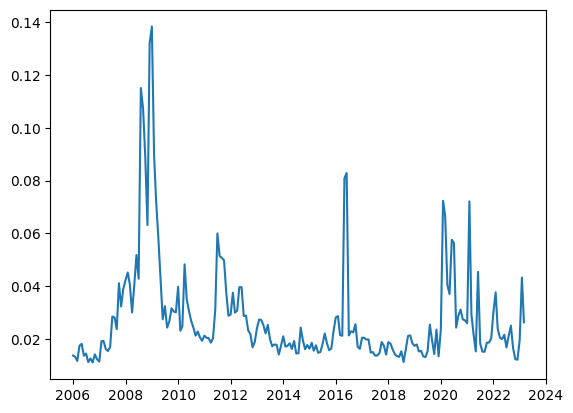

In [11]:
plt.plot(Monthly_Volatility_df[Monthly_Volatility_df.Asset == 8589934333]['V^YZ'])

### Filter-in last dates on each month

In [12]:
Monthly_Volatility_df.head(2)

,Date,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,month_key
month_key,,,,,,,,,,,
2006-01-01,2006-02-28,4295856631,9.374884,9.430687,9.263278,9.346983,-0.003964,0.009932,0.010240,0.011150,2006-01-01
2006-02-01,2006-03-31,4295856631,10.072421,10.100322,9.979416,9.998017,-0.002783,0.009381,0.008713,0.011151,2006-02-01


In [13]:
Monthly_Volatility_df = Monthly_Volatility_df[~(Monthly_Volatility_df.index.isin(['2006-01-01']))]

In [60]:
Monthly_Volatility_df.to_csv('files/1.1-FTSE_VOL30-MONTHLY-PRICES_2006-2023.csv', index=None)

## ESG Scores

In [7]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
pd.set_option('display.max_rows',30)
pd.set_option('display.max_rows', 150)

In [8]:
FTSE_ESG_Core = pd.read_csv('../data/1.2-FTSE_ESG_COR_2006-2023.csv')

In [9]:
FTSE_ESG_Core.head(2)

,Asset,Date,windowTimestamp,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-01,2006-01-01 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,87.0,NaN,30.0,61.0,86.0,85.0,46.0
1,4295856631,2006-01-02,2006-01-02 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,87.0,NaN,30.0,61.0,86.0,85.0,46.0


### Fill Null Value

In [9]:
def filna_assets_df(df):

    Assets = df.Asset.unique()
    master_df = pd.DataFrame()

    for asset in Assets:
        temp_df = df[df['Asset'] == asset]
        all_nan_columns = temp_df.columns[temp_df.isna().all()].tolist()
        temp_df[all_nan_columns] = temp_df[all_nan_columns].fillna(0)
        missing_na_cols = temp_df.columns[temp_df.isna().any()]
        
        for col in missing_na_cols:
            mrows = temp_df[col].isna().sum() + 1
            # print(col, mrows)
            roll_mean = temp_df[col][::-1].rolling(window=mrows, min_periods=1).mean()
            temp_df[col] = temp_df[col].fillna(roll_mean)
            temp_df[col] = temp_df[col].fillna(method='ffill')

        temp_df = temp_df.reset_index(drop=True)
        master_df = pd.concat([master_df, temp_df])

    return master_df

In [10]:
FTSE_ESG_Core = filna_assets_df(FTSE_ESG_Core)

In [11]:
FTSE_ESG_Core.head(2)

,Asset,Date,windowTimestamp,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-01,2006-01-01 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,0.0,100.0,75.0,87.0,4.0,30.0,61.0,86.0,85.0,46.0
1,4295856631,2006-01-02,2006-01-02 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,0.0,100.0,75.0,87.0,4.0,30.0,61.0,86.0,85.0,46.0


In [12]:
FTSE_ESG_Core.Asset = FTSE_ESG_Core.Asset.astype(int)
FTSE_ESG_Core.Date = pd.to_datetime(FTSE_ESG_Core.Date)
FTSE_ESG_Core = FTSE_ESG_Core.drop(['windowTimestamp'], axis=1)

In [13]:
esg_core_cols = FTSE_ESG_Core.columns[2:].tolist()

In [14]:
Monthly_ESG_Core_Metrics = FTSE_ESG_Core[FTSE_ESG_Core.Date.isin(date_list)].reset_index(drop=True)

In [15]:
Monthly_ESG_Core_Metrics.head(2)

,Asset,Date,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-31,458.0,59.0,59.0,66.0,76.0,32.0,67.0,0.0,100.0,62.0,83.0,4.0,16.0,63.0,86.0,85.0,43.0
1,4295856631,2006-02-28,523.0,80.0,76.0,73.0,83.0,79.0,75.0,0.0,100.0,66.0,89.0,4.0,84.0,94.0,95.0,60.0,40.0


In [16]:
Monthly_ESG_Core_Metrics['month_key'] = Monthly_ESG_Core_Metrics.Date.apply(lambda x: x + timedelta(days=10))

In [17]:
Monthly_ESG_Core_Metrics.month_key = Monthly_ESG_Core_Metrics.month_key.apply(lambda x: x.strftime('%Y-%m-01'))

---

In [21]:
# column month_key on esg_core dataframe is + 1 month to help the dataframe merge.
print('FTSE ESG News MarketPsych Min Date:', Monthly_ESG_Core_Metrics.month_key.min())
print('FTSE ESG News MarketPsych Max Date:', Monthly_ESG_Core_Metrics.month_key.max())

FTSE ESG News MarketPsych Min Date: 2006-02-01
FTSE ESG News MarketPsych Max Date: 2023-05-01


In [22]:
print('FTSE Volatility Min Date:', Monthly_Volatility_df.month_key.min())
print('FTSE Volatility Max Date:', Monthly_Volatility_df.month_key.max())

FTSE Volatility Min Date: 2006-02-01 00:00:00
FTSE Volatility Max Date: 2023-03-01 00:00:00


---

In [23]:
Monthly_ESG_Core_Metrics = Monthly_ESG_Core_Metrics[Monthly_ESG_Core_Metrics.month_key < '2023-01-01']

In [24]:
Monthly_Volatility_df = Monthly_Volatility_df[Monthly_Volatility_df.month_key < '2023-01-01']

---

In [25]:
# column month_key on esg_core dataframe is + 1 month to help the dataframe merge.
print('FTSE ESG News MarketPsych Min Date:', Monthly_ESG_Core_Metrics.month_key.min())
print('FTSE ESG News MarketPsych Max Date:', Monthly_ESG_Core_Metrics.month_key.max())

FTSE ESG News MarketPsych Min Date: 2006-02-01
FTSE ESG News MarketPsych Max Date: 2022-12-01


In [26]:
print('FTSE Volatility Min Date:', Monthly_Volatility_df.month_key.min())
print('FTSE Volatility Max Date:', Monthly_Volatility_df.month_key.max())

FTSE Volatility Min Date: 2006-02-01 00:00:00
FTSE Volatility Max Date: 2022-12-01 00:00:00


---

In [27]:
Monthly_ESG_Core_Metrics.month_key = pd.to_datetime(Monthly_ESG_Core_Metrics.month_key)

In [28]:
Monthly_Volatility_df = Monthly_Volatility_df.reset_index(drop=True)

In [29]:
merge_all_df = pd.merge(Monthly_Volatility_df,Monthly_ESG_Core_Metrics, how = 'left', on = ['month_key', 'Asset'])

In [30]:
merge_all_df

,Date_x,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,month_key,Date_y,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,2006-03-31,4295856631,10.072421,10.100322,9.979416,9.998017,-0.002783,0.009381,0.008713,0.011151,2006-02-01,2006-01-31,458.0,59.0,59.0,66.0,76.0,32.0,67.0,0.000000,100.0,62.0,83.0,4.0,16.000000,63.0,86.0,85.0,43.000000
1,2006-04-28,4295856631,10.490942,10.546745,10.342134,10.379336,-0.012389,0.008596,0.007716,0.009801,2006-03-01,2006-02-28,523.0,80.0,76.0,73.0,83.0,79.0,75.0,0.000000,100.0,66.0,89.0,4.0,84.000000,94.0,95.0,60.0,40.000000
2,2006-05-31,4295856631,10.137524,10.137524,9.914312,9.914312,-0.030909,0.014678,0.010464,0.013490,2006-04-01,2006-03-31,509.0,74.0,73.0,72.0,76.0,82.0,60.0,0.000000,100.0,45.0,93.0,4.0,90.000000,86.0,95.0,55.0,5.000000
3,2006-06-30,4295856631,10.137524,10.230529,10.063120,10.230529,0.028037,0.016566,0.010636,0.014731,2006-05-01,2006-04-28,523.0,63.0,63.0,69.0,74.0,78.0,40.0,0.000000,100.0,47.0,87.0,4.0,85.000000,88.0,90.0,53.0,12.000000
4,2006-07-31,4295856631,10.109622,10.128223,10.025918,10.100322,0.003697,0.013617,0.008261,0.011834,2006-06-01,2006-05-31,505.0,64.0,64.0,66.0,77.0,77.0,41.0,0.000000,100.0,69.0,81.0,4.0,83.000000,91.0,82.0,57.0,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,2022-10-31,5081488120,2.704998,2.729500,2.650999,2.680000,-0.004827,0.017351,0.018508,0.020788,2022-09-01,2022-08-31,154.5,44.0,25.0,6.0,30.0,49.0,78.0,47.000000,78.0,39.0,1.0,0.0,72.833333,1.0,19.0,49.0,7.333333
19255,2022-11-30,5081488120,2.842998,2.858499,2.795000,2.840999,-0.004381,0.012695,0.020143,0.019944,2022-10-01,2022-09-30,361.0,49.0,30.0,12.0,27.0,76.0,47.0,45.479167,91.0,45.0,1.0,0.0,74.000000,1.0,18.0,81.0,7.854167
19256,2022-12-30,5081488120,3.289998,3.323499,3.273499,3.273499,0.001376,0.012671,0.015879,0.021473,2022-11-01,2022-10-31,378.0,48.0,30.0,13.0,25.0,74.0,47.0,48.177215,91.0,40.0,2.0,0.0,71.000000,2.0,19.0,82.0,8.886076
19257,2023-01-31,5081488120,3.180000,3.345000,3.147500,3.242500,0.010755,0.014676,0.014254,0.015070,2022-12-01,2022-11-30,424.5,44.0,31.0,18.0,29.0,72.0,33.0,54.926606,93.0,36.0,39.0,0.0,68.000000,2.0,19.0,84.0,8.000000


In [31]:
cols = ['Date_x',
'month_key',
'Asset',
'Open',
'High',
'Low',
'Close',
'Return',
'buzz',
'ESG',
'ESGCombined',
'ESGControversies',
'EnvironmentalPillar',
'GovernancePillar',
'SocialPillar',
'CSRStrategy',
'Community',
'Emissions',
'EnvironmentalInnovation',
'HumanRights',
'Management',
'ProductResponsibility',
'ResourceUse',
'Shareholders',
'Workforce',
'V^CC',
'V^RS',
'V^YZ']

In [32]:
merge_all_df = merge_all_df[cols]

In [33]:
merge_all_df.isna().sum()

Date_x                       0
month_key                    0
Asset                        0
Open                         0
High                         0
Low                          0
Close                        0
Return                       0
buzz                       308
ESG                        308
ESGCombined                308
ESGControversies           308
EnvironmentalPillar        308
GovernancePillar           308
SocialPillar               308
CSRStrategy                308
Community                  308
Emissions                  308
EnvironmentalInnovation    308
HumanRights                308
Management                 308
ProductResponsibility      308
ResourceUse                308
Shareholders               308
Workforce                  308
V^CC                         0
V^RS                         0
V^YZ                         0
dtype: int64

In [18]:
analysis_cols = ['Date','Asset', 'Open', 'High', 'Low', 'Close', 'Return', 'V^CC', 'V^RS', 'V^YZ']
vol_anly_df = volatility_df[analysis_cols]
vol_anly_df = vol_anly_df[vol_anly_df['V^YZ'].notnull()]
# vol_anly_df = vol_anly_df[vol_anly_df.Date < '2023-01-01']

### Filter-in last dates on each month

In [19]:
Monthly_Volatility_df = vol_anly_df[vol_anly_df.Date.isin(date_list)].reset_index(drop=True)

In [20]:
Monthly_Volatility_df.loc[:, 'month_key'] = Monthly_Volatility_df.Date.apply(lambda x: x.strftime('%Y-%m-01'))
Monthly_Volatility_df.month_key = pd.to_datetime(Monthly_Volatility_df.month_key)

Monthly_Volatility_df.month_key = Monthly_Volatility_df.month_key.apply(lambda x: x - timedelta(days=10))
Monthly_Volatility_df.loc[:, 'month_key'] = Monthly_Volatility_df.month_key.apply(lambda x: x.strftime('%Y-%m-01'))

In [10]:
Monthly_Volatility_df.month_key = pd.to_datetime(Monthly_Volatility_df.month_key)
Monthly_Volatility_df.index = Monthly_Volatility_df.month_key

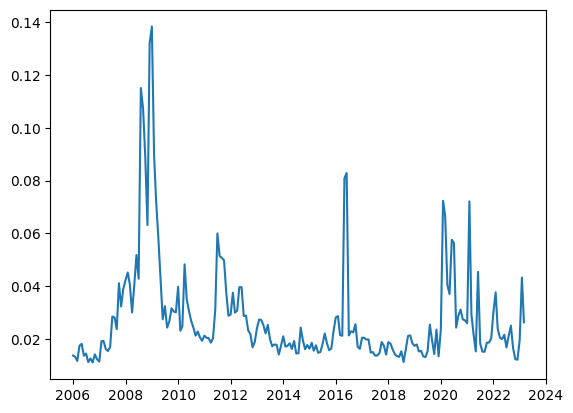

In [11]:
plt.plot(Monthly_Volatility_df[Monthly_Volatility_df.Asset == 8589934333]['V^YZ'])

### Filter-in last dates on each month

In [12]:
Monthly_Volatility_df.head(2)

,Date,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,month_key
month_key,,,,,,,,,,,
2006-01-01,2006-02-28,4295856631,9.374884,9.430687,9.263278,9.346983,-0.003964,0.009932,0.010240,0.011150,2006-01-01
2006-02-01,2006-03-31,4295856631,10.072421,10.100322,9.979416,9.998017,-0.002783,0.009381,0.008713,0.011151,2006-02-01


In [13]:
Monthly_Volatility_df = Monthly_Volatility_df[~(Monthly_Volatility_df.index.isin(['2006-01-01']))]

In [60]:
Monthly_Volatility_df.to_csv('files/1.1-FTSE_VOL30-MONTHLY-PRICES_2006-2023.csv', index=None)

## ESG Scores

In [1]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
pd.set_option('display.max_rows',30)
pd.set_option('display.max_rows', 150)

NameError: name 'pd' is not defined

In [ ]:
FTSE_ESG_Core = pd.read_csv('../data/1.2-FTSE_ESG_COR_2006-2023.csv')

### Fill Null Value

In [23]:
def filna_assets_df(df):

    Assets = df.Asset.unique()
    master_df = pd.DataFrame()

    for asset in Assets:
        temp_df = df[df['Asset'] == asset]
        all_nan_columns = temp_df.columns[temp_df.isna().all()].tolist()
        temp_df[all_nan_columns] = temp_df[all_nan_columns].fillna(0)
        missing_na_cols = temp_df.columns[temp_df.isna().any()]
        
        for col in missing_na_cols:
            mrows = temp_df[col].isna().sum() + 1
            # print(col, mrows)
            roll_mean = temp_df[col][::-1].rolling(window=mrows, min_periods=1).mean()
            temp_df[col] = temp_df[col].fillna(roll_mean)
            temp_df[col] = temp_df[col].fillna(method='ffill')

        temp_df = temp_df.reset_index(drop=True)
        master_df = pd.concat([master_df, temp_df])

    return master_df

In [24]:
FTSE_ESG_Core = filna_assets_df(FTSE_ESG_Core)

In [25]:
FTSE_ESG_Core.head(2)

,Asset,Date,windowTimestamp,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-01,2006-01-01 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,0.0,100.0,75.0,87.0,4.0,30.0,61.0,86.0,85.0,46.0
1,4295856631,2006-01-02,2006-01-02 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,0.0,100.0,75.0,87.0,4.0,30.0,61.0,86.0,85.0,46.0


In [26]:
FTSE_ESG_Core.Asset = FTSE_ESG_Core.Asset.astype(int)
FTSE_ESG_Core.Date = pd.to_datetime(FTSE_ESG_Core.Date)
FTSE_ESG_Core = FTSE_ESG_Core.drop(['windowTimestamp'], axis=1)
esg_core_cols = FTSE_ESG_Core.columns[2:].tolist()

In [27]:
Monthly_ESG_Core_Metrics = FTSE_ESG_Core[FTSE_ESG_Core.Date.isin(date_list)].reset_index(drop=True)

In [28]:
Monthly_ESG_Core_Metrics.head(2)

,Asset,Date,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-31,458.0,59.0,59.0,66.0,76.0,32.0,67.0,0.0,100.0,62.0,83.0,4.0,16.0,63.0,86.0,85.0,43.0
1,4295856631,2006-02-28,523.0,80.0,76.0,73.0,83.0,79.0,75.0,0.0,100.0,66.0,89.0,4.0,84.0,94.0,95.0,60.0,40.0


In [19]:
Monthly_ESG_Core_Metrics['month_key'] = Monthly_ESG_Core_Metrics.Date.apply(lambda x: x + timedelta(days=10))

In [20]:
Monthly_ESG_Core_Metrics.month_key = Monthly_ESG_Core_Metrics.month_key.apply(lambda x: x.strftime('%Y-%m-01'))

---

In [21]:
# column month_key on esg_core dataframe is + 1 month to help the dataframe merge.
print('FTSE ESG News MarketPsych Min Date:', Monthly_ESG_Core_Metrics.month_key.min())
print('FTSE ESG News MarketPsych Max Date:', Monthly_ESG_Core_Metrics.month_key.max())

FTSE ESG News MarketPsych Min Date: 2006-02-01
FTSE ESG News MarketPsych Max Date: 2023-05-01


In [22]:
print('FTSE Volatility Min Date:', Monthly_Volatility_df.month_key.min())
print('FTSE Volatility Max Date:', Monthly_Volatility_df.month_key.max())

FTSE Volatility Min Date: 2006-02-01 00:00:00
FTSE Volatility Max Date: 2023-03-01 00:00:00


---

In [23]:
Monthly_ESG_Core_Metrics = Monthly_ESG_Core_Metrics[Monthly_ESG_Core_Metrics.month_key < '2023-01-01']

In [24]:
Monthly_Volatility_df = Monthly_Volatility_df[Monthly_Volatility_df.month_key < '2023-01-01']

---

In [25]:
# column month_key on esg_core dataframe is + 1 month to help the dataframe merge.
print('FTSE ESG News MarketPsych Min Date:', Monthly_ESG_Core_Metrics.month_key.min())
print('FTSE ESG News MarketPsych Max Date:', Monthly_ESG_Core_Metrics.month_key.max())

FTSE ESG News MarketPsych Min Date: 2006-02-01
FTSE ESG News MarketPsych Max Date: 2022-12-01


In [26]:
print('FTSE Volatility Min Date:', Monthly_Volatility_df.month_key.min())
print('FTSE Volatility Max Date:', Monthly_Volatility_df.month_key.max())

FTSE Volatility Min Date: 2006-02-01 00:00:00
FTSE Volatility Max Date: 2022-12-01 00:00:00


---

In [27]:
Monthly_ESG_Core_Metrics.month_key = pd.to_datetime(Monthly_ESG_Core_Metrics.month_key)

In [28]:
Monthly_Volatility_df = Monthly_Volatility_df.reset_index(drop=True)

In [29]:
merge_all_df = pd.merge(Monthly_Volatility_df,Monthly_ESG_Core_Metrics, how = 'left', on = ['month_key', 'Asset'])

In [30]:
merge_all_df

,Date_x,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,month_key,Date_y,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,2006-03-31,4295856631,10.072421,10.100322,9.979416,9.998017,-0.002783,0.009381,0.008713,0.011151,2006-02-01,2006-01-31,458.0,59.0,59.0,66.0,76.0,32.0,67.0,0.000000,100.0,62.0,83.0,4.0,16.000000,63.0,86.0,85.0,43.000000
1,2006-04-28,4295856631,10.490942,10.546745,10.342134,10.379336,-0.012389,0.008596,0.007716,0.009801,2006-03-01,2006-02-28,523.0,80.0,76.0,73.0,83.0,79.0,75.0,0.000000,100.0,66.0,89.0,4.0,84.000000,94.0,95.0,60.0,40.000000
2,2006-05-31,4295856631,10.137524,10.137524,9.914312,9.914312,-0.030909,0.014678,0.010464,0.013490,2006-04-01,2006-03-31,509.0,74.0,73.0,72.0,76.0,82.0,60.0,0.000000,100.0,45.0,93.0,4.0,90.000000,86.0,95.0,55.0,5.000000
3,2006-06-30,4295856631,10.137524,10.230529,10.063120,10.230529,0.028037,0.016566,0.010636,0.014731,2006-05-01,2006-04-28,523.0,63.0,63.0,69.0,74.0,78.0,40.0,0.000000,100.0,47.0,87.0,4.0,85.000000,88.0,90.0,53.0,12.000000
4,2006-07-31,4295856631,10.109622,10.128223,10.025918,10.100322,0.003697,0.013617,0.008261,0.011834,2006-06-01,2006-05-31,505.0,64.0,64.0,66.0,77.0,77.0,41.0,0.000000,100.0,69.0,81.0,4.0,83.000000,91.0,82.0,57.0,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,2022-10-31,5081488120,2.704998,2.729500,2.650999,2.680000,-0.004827,0.017351,0.018508,0.020788,2022-09-01,2022-08-31,154.5,44.0,25.0,6.0,30.0,49.0,78.0,47.000000,78.0,39.0,1.0,0.0,72.833333,1.0,19.0,49.0,7.333333
19255,2022-11-30,5081488120,2.842998,2.858499,2.795000,2.840999,-0.004381,0.012695,0.020143,0.019944,2022-10-01,2022-09-30,361.0,49.0,30.0,12.0,27.0,76.0,47.0,45.479167,91.0,45.0,1.0,0.0,74.000000,1.0,18.0,81.0,7.854167
19256,2022-12-30,5081488120,3.289998,3.323499,3.273499,3.273499,0.001376,0.012671,0.015879,0.021473,2022-11-01,2022-10-31,378.0,48.0,30.0,13.0,25.0,74.0,47.0,48.177215,91.0,40.0,2.0,0.0,71.000000,2.0,19.0,82.0,8.886076
19257,2023-01-31,5081488120,3.180000,3.345000,3.147500,3.242500,0.010755,0.014676,0.014254,0.015070,2022-12-01,2022-11-30,424.5,44.0,31.0,18.0,29.0,72.0,33.0,54.926606,93.0,36.0,39.0,0.0,68.000000,2.0,19.0,84.0,8.000000


In [31]:
cols = ['Date_x',
'month_key',
'Asset',
'Open',
'High',
'Low',
'Close',
'Return',
'buzz',
'ESG',
'ESGCombined',
'ESGControversies',
'EnvironmentalPillar',
'GovernancePillar',
'SocialPillar',
'CSRStrategy',
'Community',
'Emissions',
'EnvironmentalInnovation',
'HumanRights',
'Management',
'ProductResponsibility',
'ResourceUse',
'Shareholders',
'Workforce',
'V^CC',
'V^RS',
'V^YZ']

In [32]:
merge_all_df = merge_all_df[cols]

In [33]:
merge_all_df.isna().sum()

Date_x                       0
month_key                    0
Asset                        0
Open                         0
High                         0
Low                          0
Close                        0
Return                       0
buzz                       308
ESG                        308
ESGCombined                308
ESGControversies           308
EnvironmentalPillar        308
GovernancePillar           308
SocialPillar               308
CSRStrategy                308
Community                  308
Emissions                  308
EnvironmentalInnovation    308
HumanRights                308
Management                 308
ProductResponsibility      308
ResourceUse                308
Shareholders               308
Workforce                  308
V^CC                         0
V^RS                         0
V^YZ                         0
dtype: int64

In [34]:
merge_all_df[merge_all_df['Asset'] == 4295894186]

,Date_x,month_key,Asset,Open,High,Low,Close,Return,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce,V^CC,V^RS,V^YZ
415,2006-03-31,2006-02-01,4295894186,2.839998,2.844998,2.779998,2.829998,-0.000883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018582,0.019121,0.020331
416,2006-04-28,2006-03-01,4295894186,2.992498,3.004998,2.967498,2.977498,-0.005013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014803,0.017931,0.018218
417,2006-05-31,2006-04-01,4295894186,2.719998,2.912498,2.719998,2.897498,0.053635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024055,0.021935,0.023230
418,2006-06-30,2006-05-01,4295894186,2.857498,2.927498,2.812500,2.844998,0.009760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022489,0.019949,0.022858
419,2006-07-31,2006-06-01,4295894186,2.939998,2.979998,2.924998,2.944998,-0.004227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012291,0.015207,0.016903
420,2006-08-31,2006-07-01,4295894186,3.157498,3.177498,3.139998,3.174998,0.011147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012838,0.012572,0.014177
421,2006-09-29,2006-08-01,4295894186,3.127498,3.144998,3.117498,3.129998,0.005622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012849,0.012198,0.013123
422,2006-10-31,2006-09-01,4295894186,3.319998,3.375000,3.319998,3.347498,-0.002235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013827,0.014068,0.015595
423,2006-11-30,2006-10-01,4295894186,3.422498,3.467498,3.377498,3.392498,-0.013092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013813,0.017538,0.019861
424,2006-12-29,2006-11-01,4295894186,3.822498,3.837498,3.799998,3.817498,-0.003914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019069,0.016159,0.017657


In [35]:
merge_all_fill_df = filna_assets_df(merge_all_df)

In [36]:
merge_all_fill_df[merge_all_fill_df['Asset'] == 4295894186].head(15)

,Date_x,month_key,Asset,Open,High,Low,Close,Return,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce,V^CC,V^RS,V^YZ
0,2006-03-31,2006-02-01,4295894186,2.839998,2.844998,2.779998,2.829998,-0.000883,2.000000,24.571429,24.571429,87.571429,24.571429,44.982829,49.279415,0.0,46.734847,24.571429,38.641096,0.0,35.066861,41.750000,33.630137,48.852676,0.0,0.018582,0.019121,0.020331
1,2006-04-28,2006-03-01,4295894186,2.992498,3.004998,2.967498,2.977498,-0.005013,2.500000,25.375000,25.375000,88.625000,23.625000,44.247121,49.494488,0.0,47.267991,23.625000,38.641096,0.0,35.033845,41.750000,33.630137,48.119067,0.0,0.014803,0.017931,0.018218
2,2006-05-31,2006-04-01,4295894186,2.719998,2.912498,2.719998,2.897498,0.053635,4.222222,27.444444,26.111111,81.000000,25.111111,43.523526,49.661767,0.0,47.571548,25.111111,38.641096,0.0,35.008167,42.888889,33.666881,47.405718,0.0,0.024055,0.021935,0.023230
3,2006-06-30,2006-05-01,4295894186,2.857498,2.927498,2.812500,2.844998,0.009760,6.800000,29.700000,28.400000,77.800000,27.600000,42.883432,49.695590,0.0,47.214393,26.800000,40.676986,0.0,34.987624,44.600000,35.300193,46.720307,0.0,0.022489,0.019949,0.022858
4,2006-07-31,2006-06-01,4295894186,2.939998,2.979998,2.924998,2.944998,-0.004227,9.272727,31.454545,30.272727,75.727273,29.545455,42.316568,49.541446,0.0,46.831266,28.454545,41.979078,0.0,34.970817,45.636364,36.545630,46.071178,0.0,0.012291,0.015207,0.016903
5,2006-08-31,2006-07-01,4295894186,3.157498,3.177498,3.139998,3.174998,0.011147,11.333333,32.666667,31.583333,74.000000,31.000000,41.813772,49.079659,0.0,46.095328,29.750000,42.647489,0.0,34.956810,46.333333,37.500161,45.447305,0.0,0.012838,0.012572,0.014177
6,2006-09-29,2006-08-01,4295894186,3.127498,3.144998,3.117498,3.129998,0.005622,13.000000,33.615385,32.615385,72.615385,32.000000,41.426985,48.842762,0.0,45.934149,30.692308,42.828451,0.0,34.944959,46.692308,38.153995,44.919412,0.0,0.012849,0.012198,0.013123
7,2006-10-31,2006-09-01,4295894186,3.319998,3.375000,3.319998,3.347498,-0.002235,14.428571,34.142857,33.214286,71.500000,32.571429,41.120096,48.496850,0.0,45.581709,31.285714,42.840705,0.0,34.934800,46.714286,38.142995,44.466932,0.0,0.013827,0.014068,0.015595
8,2006-11-30,2006-10-01,4295894186,3.422498,3.467498,3.377498,3.392498,-0.013092,15.666667,34.266667,33.400000,70.466667,32.733333,40.863065,47.863727,0.0,45.076262,31.400000,42.517991,0.0,34.925996,46.333333,38.000129,44.074784,0.0,0.013813,0.017538,0.019861
9,2006-12-29,2006-11-01,4295894186,3.822498,3.837498,3.799998,3.817498,-0.003914,16.750000,34.250000,33.437500,69.625000,32.750000,40.632698,47.122244,0.0,44.446496,31.375000,42.110616,0.0,34.918293,45.750000,37.750121,43.731653,0.0,0.019069,0.016159,0.017657


In [37]:
merge_all_fill_df.isna().sum()

Date_x                     0
month_key                  0
Asset                      0
Open                       0
High                       0
Low                        0
Close                      0
Return                     0
buzz                       0
ESG                        0
ESGCombined                0
ESGControversies           0
EnvironmentalPillar        0
GovernancePillar           0
SocialPillar               0
CSRStrategy                0
Community                  0
Emissions                  0
EnvironmentalInnovation    0
HumanRights                0
Management                 0
ProductResponsibility      0
ResourceUse                0
Shareholders               0
Workforce                  0
V^CC                       0
V^RS                       0
V^YZ                       0
dtype: int64

In [38]:
merge_all_fill_df.to_csv('files/1.3-FTSE_Monthly_ESG_Volatility_Final.csv', index=None)

# Selecting M2 Datasets

## Based on VIF

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
from set_params import func_train_test_split, vif_check

In [20]:
?func_train_test_split

Signature: func_train_test_split(validation=False, threshold=24)
Docstring:     
File:      /notebooks/esgnews_volatility/notebook/set_params.py
Type:      function


In [2]:
vif_check()

['buzz',
 'CSRStrategy',
 'Community',
 'Emissions',
 'EnvironmentalInnovation',
 'HumanRights',
 'ProductResponsibility',
 'ResourceUse',
 'Workforce',
 'vol_series_daily',
 'vol_series_monthly',
 'V^YZ']

---

In [49]:
banks_predictions = pd.read_csv('../data/9-ESG News to Stock Volatility Projects - Sheet10.csv')

In [50]:
banks_predictions['month_key'] = pd.to_datetime(banks_predictions['month_key'])

In [51]:
banks_predictions.index = banks_predictions.month_key

In [52]:
banks_predictions = banks_predictions.drop(['month_key'], axis=1)

In [53]:
banks_predictions.head(1)

,Asset,Test Data,Predictions-EN,Predictions-GARCH,Predictions-HAR,Predictions-RF
month_key,,,,,,
2017-12-01,8589934212,0.011617,0.03072,0.018099,0.023731,0.014332


In [69]:
coverage_df[coverage_df['PermID'] == 8589934254]

,version,filedate,MPID,PermID,Name,TRBC,TRBC_PermID,TRBCEconomicSector,Ticker,MIC,RIC,Domicile,ExchangeCountry,ExchangeCode,InfoCode,Region,SEDOL,SEDOLstatus,status
121108,4.0.30,2023-07-08,LLOY,8589934254,Lloyds Banking Group PLC,5510101010,4294951386,Financials,LLOY,XLON,LLOY.L,GB,GB,104,45968,EMEA,BRTM7Q0,active,active


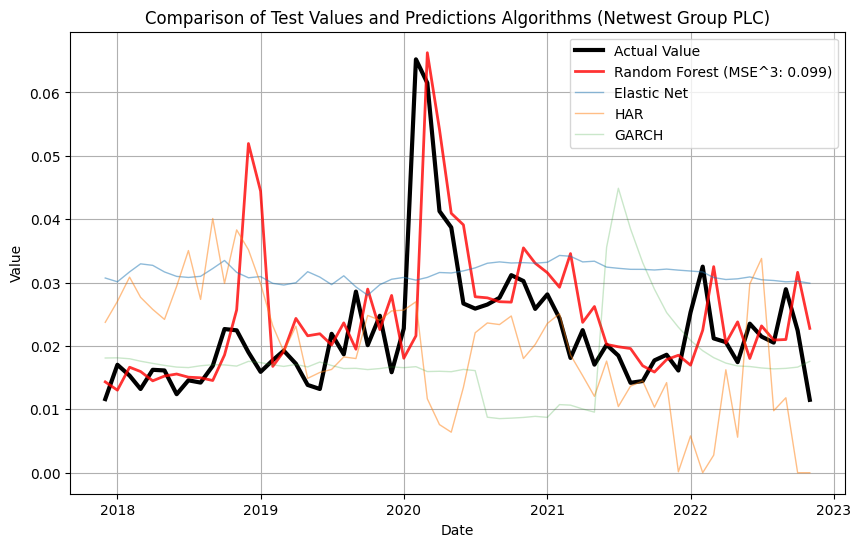

In [74]:
import matplotlib.pyplot as plt

df_subset = banks_predictions[banks_predictions['Asset'] == 8589934212]


# Assuming your DataFrame is named df and the columns are named accordingly
df_subset = df_subset.sort_index()  # make sure your DataFrame is sorted by date

# Create a new figure and set the size
plt.figure(figsize=(10,6))

# Plot each column
plt.plot(df_subset.index, df_subset['Test Data'], label='Actual Value', linewidth=3, color = 'black')
plt.plot(df_subset.index, df_subset['Predictions-RF'], label='Random Forest (MSE^3: 0.099)', linewidth=2, alpha = 0.8, color = 'red')
plt.plot(df_subset.index, df_subset['Predictions-EN'], label='Elastic Net', linewidth=1, alpha = 0.5)
plt.plot(df_subset.index, df_subset['Predictions-HAR'], label='HAR', linewidth=1, alpha = 0.5)
plt.plot(df_subset.index, df_subset['Predictions-GARCH'], label='GARCH', linewidth=1, alpha = 0.25)

# Customizing the plot
plt.title('Comparison of Test Values and Predictions Algorithms (Netwest Group PLC)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


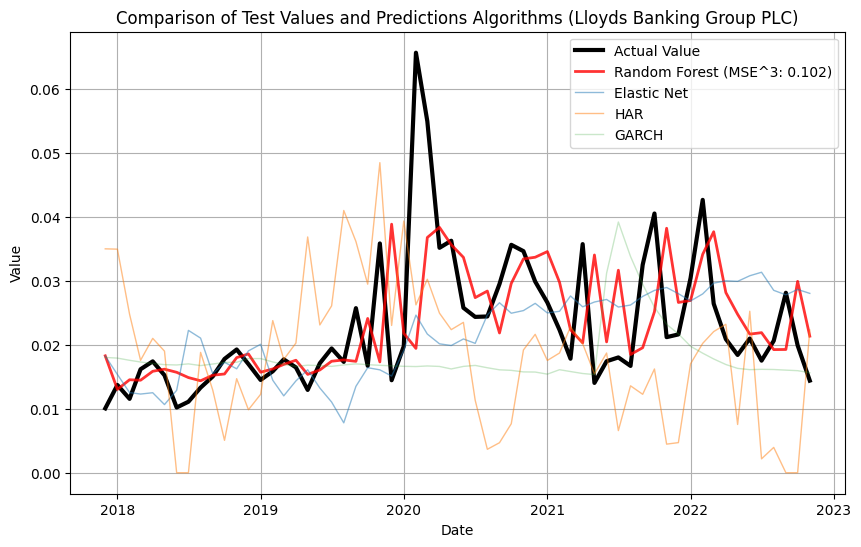

In [75]:
import matplotlib.pyplot as plt

df_subset = banks_predictions[banks_predictions['Asset'] != 8589934212]


# Assuming your DataFrame is named df and the columns are named accordingly
df_subset = df_subset.sort_index()  # make sure your DataFrame is sorted by date

# Create a new figure and set the size
plt.figure(figsize=(10,6))

# Plot each column
plt.plot(df_subset.index, df_subset['Test Data'], label='Actual Value', linewidth=3, color = 'black')
plt.plot(df_subset.index, df_subset['Predictions-RF'], label='Random Forest (MSE^3: 0.102)', linewidth=2, alpha = 0.8, color = 'red')
plt.plot(df_subset.index, df_subset['Predictions-EN'], label='Elastic Net', linewidth=1, alpha = 0.5)
plt.plot(df_subset.index, df_subset['Predictions-HAR'], label='HAR', linewidth=1, alpha = 0.5)
plt.plot(df_subset.index, df_subset['Predictions-GARCH'], label='GARCH', linewidth=1, alpha = 0.25)

# Customizing the plot
plt.title('Comparison of Test Values and Predictions Algorithms (Lloyds Banking Group PLC)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
